In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Final_file_path = "cleaned_file.csv"
data = pd.read_csv(Final_file_path, low_memory=False)

In [ ]:
import pandas as pd
chunksize = 25000

chunks = []  # Her gemmer vi de rensede chunks

for chunk in pd.read_csv(Final_file_path, chunksize=chunksize, low_memory=False, converters={"content": eval}):
    # Fjern 'num' fra token-lister
    chunk['content'] = chunk['content'].apply(
        lambda tokens: [word for word in tokens if word != 'num']
    )
    chunks.append(chunk)  # Tilføj den rensede chunk

# Saml det hele til én DataFrame (nu uden 'num')
data = pd.concat(chunks, ignore_index=True)

# Liste over værdier du vil fjerne
to_exclude = [
    'satire', 'conspiracy', 'junksci', 'unreliable', 'rumor',
    'unknown', 'nan', 'hate', '<NUM><DATE> <NUM>:<NUM>:<NUM>'
]

# Fjern rækker hvor 'type' matcher nogen af ovenstående
data = data[~data['type'].isin(to_exclude)]
data = data.dropna(subset=['type'])

print(data['type'].unique())

# Definér mapping
label_mapping = {
    "political": "True",
    "clickbait": "True",
    "reliable": "True",
    "fake": "Fake",
    "bias": "Fake"
}

# Opret label-kolonnen først
data["label"] = data["type"].map(label_mapping)

# Konverter 'True' til 1 og 'Fake' til 0
data["label"] = data["label"].map({"True": 1, "Fake": 0})


# Definér y (målvariabel)
global y
y = data["label"].dropna().astype(int)

# Tjek om det virker
print(y.unique())  # Skal vise [1 0]



['political' 'fake' 'reliable' 'bias' 'clickbait']
[1 0]


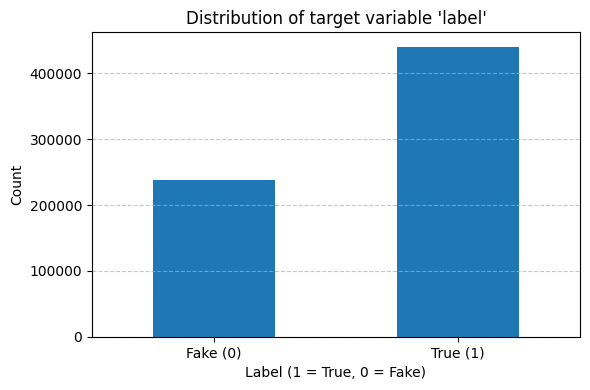

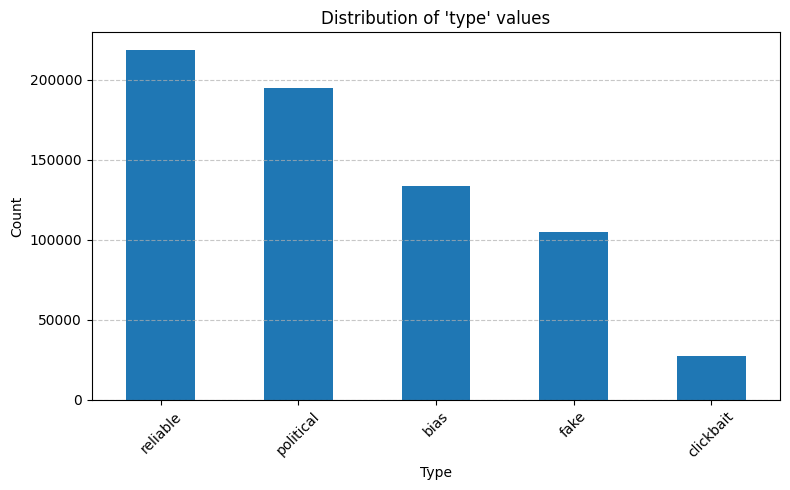

Top 10 mest hyppige ord i 'content':
said: 1107933
new: 813044
one: 797395
time: 720863
would: 689807
state: 673134
year: 671971
peopl: 608759
like: 585469
also: 463556

Frekvens af 'num': 0


In [ ]:
import matplotlib.pyplot as plt

# Plot fordelingen af 'label' (målvariabel)
plt.figure(figsize=(6, 4))
data['label'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of target variable 'label'")
plt.xlabel("Label (1 = True, 0 = Fake)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Fake (0)", "True (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot fordelingen af 'type'
plt.figure(figsize=(8, 5))
data['type'].value_counts().plot(kind='bar')
plt.title("Distribution of 'type' values")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import numpy as np

# Ensure text data is string type
data["content"] = data["content"].fillna("").astype(str)
data["type"] = data["type"].fillna("").astype(str)

#Vectorize text data
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), binary=True)
X = vectorizer.fit_transform(data["content"])

# Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["type"])

# Splitting dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Implementing logistic regression
clf = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42, solver="saga", n_jobs=-1)
clf.fit(X_train, y_train)

# Evaluating the model
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class classification

# Display results
print(f"F1-score: {f1:.4f}")
print("Hyperparameters for Logistic Regression:")
print(f"Max Iterations: {clf.max_iter}")
print(f"Solver: {clf.solver}")
print(f"Random State: {clf.random_state}")

F1-score: 0.8084
Hyperparameters for Logistic Regression:
Max Iterations: 500
Solver: saga
Random State: 42


c:\Users\simon\anaconda3\envs\my_environment\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
